In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import sys
sys.path.append('/home/aliche/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as pl
import pickle as pkl
import fnmatch,os
import itertools
import statsmodels.formula.api as sm
from scipy.stats import pearsonr,ttest_ind,ranksums,linregress,ks_2samp,entropy,mannwhitneyu,spearmanr,wilcoxon
import pandas as pd
import seaborn as sns
from signale.tools import locate

/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/NeuroTools/analysis.py:34: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aliche/anaconda3/envs/py27/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aliche/anaconda3/envs/py27/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aliche/anaconda3/envs/

In [3]:
###100ms
les100rn = sorted([os.path.join(item[0],item[1])for item in locate('*100ms.lsn','../PCA_MEC/DATA_REV/')])
cnt100rn = sorted([os.path.join(item[0],item[1])for item in locate('*100ms.cnt','../PCA_MEC/DATA_REV/')])
###Theta
lesThrn = sorted([os.path.join(item[0],item[1])for item in locate('*-theta.lsn','../PCA_MEC/DATA_REV/')])
cntThrn = sorted([os.path.join(item[0],item[1])for item in locate('*-theta.cnt','../PCA_MEC/DATA_REV/')])
##############################################################################
###100ms
les100 = sorted([os.path.join(item[0],item[1])for item in locate('*100ms-vis.lsn','../PCA_MEC/DATA_REV/')])
les100Pre = np.array([])
les100Imm = np.array([])
les100Post = np.array([])
for item in les100:
    les100Pre  = np.append(les100Pre,pkl.load(open(item,'rb'))[0])
    les100Imm  = np.append(les100Imm,pkl.load(open(item,'rb'))[1])
    les100Post = np.append(les100Post,pkl.load(open(item,'rb'))[2])
cnt100 = sorted([os.path.join(item[0],item[1])for item in locate('*100ms-vis.cnt','../PCA_MEC/DATA_REV/')])
cnt100Pre = np.array([])
cnt100Imm = np.array([])
cnt100Post = np.array([])
for item in cnt100:
    cnt100Pre  = np.append(cnt100Pre,pkl.load(open(item,'rb'))[0])
    cnt100Imm  = np.append(cnt100Imm,pkl.load(open(item,'rb'))[1])
    cnt100Post = np.append(cnt100Post,pkl.load(open(item,'rb'))[2])
###Theta
lesTh = sorted([os.path.join(item[0],item[1])for item in locate('*-theta-vis.lsn','../PCA_MEC/DATA_REV/')])
lesThPre = np.array([])
lesThImm = np.array([])
lesThPost = np.array([])
for item in lesTh:
    lesThPre  = np.append(lesThPre,pkl.load(open(item,'rb'))[0])
    lesThImm  = np.append(lesThImm,pkl.load(open(item,'rb'))[1])
    lesThPost = np.append(lesThPost,pkl.load(open(item,'rb'))[2])
cntTh = sorted([os.path.join(item[0],item[1])for item in locate('*-theta-vis.cnt','../PCA_MEC/DATA_REV/')])
cntThPre = np.array([])
cntThImm = np.array([])
cntThPost = np.array([])
for item in cntTh:
    cntThPre  = np.append(cntThPre,pkl.load(open(item,'rb'))[0])
    cntThImm  = np.append(cntThImm,pkl.load(open(item,'rb'))[1])
    cntThPost = np.append(cntThPost,pkl.load(open(item,'rb'))[2])

##############################################################################

In [4]:
shuffled_slopes = pkl.load(open('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/SlopesShuffled.pkl','rb'))
shuffled_gammas = pkl.load(open('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/GammaShuffled.pkl','rb'))

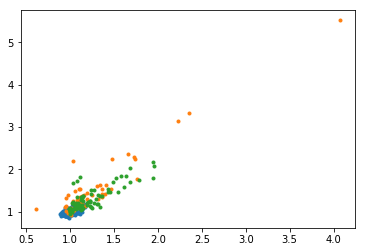

In [5]:
pl.plot(shuffled_gammas[:1000,0],shuffled_gammas[:1000,1],'.')
pl.plot(cntThPre,cntThPost,'.')
pl.plot(lesThPre,lesThPost,'.')

In [6]:
print 'Control Gamma Tests'
print '===========PRE==============='
print ttest_ind(cntThPre,shuffled_gammas[:,0])
print ranksums(cntThPre,shuffled_gammas[:,0])
print mannwhitneyu(cntThPre,shuffled_gammas[:,0])

print '===========IMM==============='
print ttest_ind(cntThImm,shuffled_gammas[:,1])
print ranksums(cntThImm,shuffled_gammas[:,1])
print mannwhitneyu(cntThImm,shuffled_gammas[:,1])

print '===========POST==============='
print ttest_ind(cntThPost,shuffled_gammas[:,1])
print ranksums(cntThPost,shuffled_gammas[:,1])
print mannwhitneyu(cntThPost,shuffled_gammas[:,1])


Control Gamma Tests
===========PRE===============
Ttest_indResult(statistic=48.51439926785624, pvalue=0.0)
RanksumsResult(statistic=8.535247929837157, pvalue=1.398551991303051e-17)
MannwhitneyuResult(statistic=1110525.0, pvalue=6.992867585371401e-18)
===========IMM===============
Ttest_indResult(statistic=148.05929697627542, pvalue=0.0)
RanksumsResult(statistic=10.978801029692152, pvalue=4.832954626942115e-28)
MannwhitneyuResult(statistic=423930.0, pvalue=2.4165249087932383e-28)
===========POST===============
Ttest_indResult(statistic=88.13167370053532, pvalue=0.0)
RanksumsResult(statistic=10.960411966464264, pvalue=5.922912988758572e-28)
MannwhitneyuResult(statistic=429097.0, pvalue=2.9615147275568303e-28)


In [7]:
print 'Lesion Gamma Tests'
print '===========PRE==============='
print ttest_ind(lesThPre,shuffled_gammas[:,0])
print ranksums(lesThPre,shuffled_gammas[:,0])
print mannwhitneyu(lesThPre,shuffled_gammas[:,0])

print '===========IMM==============='
print ttest_ind(lesThImm,shuffled_gammas[:,1])
print ranksums(lesThImm,shuffled_gammas[:,1])
print mannwhitneyu(lesThImm,shuffled_gammas[:,1])

print '===========POST==============='
print ttest_ind(lesThPost,shuffled_gammas[:,1])
print ranksums(lesThPost,shuffled_gammas[:,1])
print mannwhitneyu(lesThPost,shuffled_gammas[:,1])

Lesion Gamma Tests
===========PRE===============
Ttest_indResult(statistic=50.952231826632556, pvalue=0.0)
RanksumsResult(statistic=12.60920948961071, pvalue=1.8786790592963717e-36)
MannwhitneyuResult(statistic=689005.0, pvalue=9.393575514776752e-37)
===========IMM===============
Ttest_indResult(statistic=102.80823289525684, pvalue=0.0)
RanksumsResult(statistic=13.46055507177262, pvalue=2.6690362761115755e-41)
MannwhitneyuResult(statistic=407503.0, pvalue=1.334545449899383e-41)
===========POST===============
Ttest_indResult(statistic=66.62990246889464, pvalue=0.0)
RanksumsResult(statistic=13.25210844295674, pvalue=4.387024964298939e-40)
MannwhitneyuResult(statistic=476427.0, pvalue=2.1935566862482378e-40)


In [8]:
linregress(cntThPre,cntThPost)

LinregressResult(slope=1.418768055503035, intercept=-0.279153049885176, rvalue=0.9466751484454189, pvalue=3.010918185638646e-26, stderr=0.06828683634303076)

In [9]:
ols = sm.OLS(cntThPre,cntThPost).fit()
print ols.summary()
print ols.pvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2142.
Date:                Fri, 18 May 2018   Prob (F-statistic):           2.50e-43
Time:                        07:45:41   Log-Likelihood:                 7.5059
No. Observations:                  52   AIC:                            -13.01
Df Residuals:                      51   BIC:                            -11.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7946      0.017     46.279      0.0

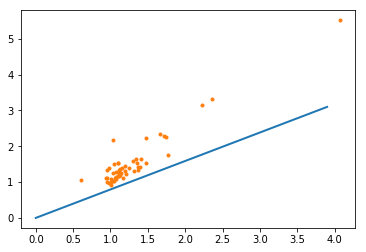

In [10]:
x_new = np.arange(0,4,0.1)
pred = ols.predict(x_new)
pl.plot(x_new,pred)
pl.plot(cntThPre,cntThPost,'.')

In [11]:
print 'Control --------->',spearmanr(cntThPre,cntThImm)
print 'Lesion --------->',spearmanr(lesThPre,lesThImm)

Control ---------> SpearmanrResult(correlation=0.7040894732348673, pvalue=5.765624020877721e-09)
Lesion ---------> SpearmanrResult(correlation=0.5002572512701783, pvalue=7.65673532026784e-06)


In [12]:
spearmanr(shuffled_gammas[:,0],shuffled_gammas[:,1])

SpearmanrResult(correlation=0.3766157278776712, pvalue=0.0)

In [13]:
slopeDB = pd.read_pickle('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Slopes.db')

In [14]:
print ranksums(slopeDB[slopeDB.group=='control_im'].slope,slopeDB[slopeDB.group=='lesioned_im'].slope)

RanksumsResult(statistic=2.3927659616787476, pvalue=0.01672190375949676)


In [15]:
slopeDB[slopeDB.group=='lesioned_im'].shape[0]+slopeDB[slopeDB.group=='control_im'].shape[0]

31

In [16]:
print ranksums(slopeDB[slopeDB.group=='control_po'].slope,slopeDB[slopeDB.group=='lesioned_po'].slope)
slopeDB[slopeDB.group=='lesioned_po'].shape[0]+slopeDB[slopeDB.group=='control_po'].shape[0]

RanksumsResult(statistic=3.20387306733256, pvalue=0.0013559224231836037)


31

In [17]:
z_cnt_im = (slopeDB[slopeDB.group=='control_im'].slope)
print wilcoxon(z_cnt_im,y=np.ones_like(z_cnt_im))
print wilcoxon(slopeDB[slopeDB.group=='control_po'].slope,np.ones_like(z_cnt_im))
print wilcoxon(slopeDB[slopeDB.group=='control_po'].slope,slopeDB[slopeDB.group=='control_im'].slope)

WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049)
WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049)
WilcoxonResult(statistic=13.0, pvalue=0.041389404009149304)


In [18]:
print wilcoxon(slopeDB[slopeDB.group=='lesioned_im'].slope)
print wilcoxon(slopeDB[slopeDB.group=='lesioned_po'].slope)
print wilcoxon(slopeDB[slopeDB.group=='lesioned_po'].slope,slopeDB[slopeDB.group=='lesioned_im'].slope)

WilcoxonResult(statistic=0.0, pvalue=0.0001318338889828333)
WilcoxonResult(statistic=0.0, pvalue=0.0001318338889828333)
WilcoxonResult(statistic=5.0, pvalue=0.00029256438440193296)


In [20]:
cnt_diff_Im = (cntThImm - cntThPre)/(cntThImm + cntThPre)*100
les_diff_Im = (lesThImm - lesThPre)/(lesThImm + lesThPre)*100
cnt_diff_Po = (cntThPost - cntThPre)/(cntThPost + cntThPre)*100
les_diff_Po = (lesThPost - lesThPre)/(lesThPost + lesThPre)*100
print wilcoxon(cnt_diff_Im)
print wilcoxon(les_diff_Im)

WilcoxonResult(statistic=60.0, pvalue=1.0147158704532841e-08)
WilcoxonResult(statistic=380.0, pvalue=1.5943047101625235e-07)


In [22]:
print wilcoxon(cnt_diff_Im,cnt_diff_Po)
print wilcoxon(les_diff_Im,les_diff_Po)

WilcoxonResult(statistic=199.0, pvalue=8.105084475971961e-06)
WilcoxonResult(statistic=623.0, pvalue=0.00010545721385243926)


In [92]:
ranksums(cnt_diff_Im,les_diff_Im)

RanksumsResult(statistic=4.395288853143113, pvalue=1.1062554962606284e-05)